In [1]:
import numpy as np  
import pandas as pd 

In [2]:
train = pd.read_csv("train.txt")

In [3]:
train.to_csv("train.csv")

In [4]:
#test = pd.read_csv("test.txt")

In [5]:
#test.to_csv("test.csv")

In [6]:
#train['source']='train'
#test['source']='test'

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
#data = pd.concat([train,test],ignore_index=True)
data = pd.read_csv('train.csv')

In [10]:
#print(train.shape,test.shape,data.shape) # train and test datasets have variations in columns

In [11]:
data.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
data.shape

(8523, 13)

In [13]:
data = data.drop(['Unnamed: 0'],axis=1)

# Exploratory Data Analysis

In [14]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [16]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
data.groupby('Item_Fat_Content').count()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,,,,,,,,,,,
LF,316,260,316,316,316,316,316,233,316,316,316
Low Fat,5089,4222,5089,5089,5089,5089,5089,3641,5089,5089,5089
Regular,2889,2388,2889,2889,2889,2889,2889,2076,2889,2889,2889
low fat,112,84,112,112,112,112,112,81,112,112,112
reg,117,106,117,117,117,117,117,82,117,117,117


In [18]:
data.groupby('Outlet_Type').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
Outlet_Type,,,,,,,,,,,
Grocery Store,1083,555,1083,1083,1083,1083,1083,1083,528,1083,1083
Supermarket Type1,5577,5577,5577,5577,5577,5577,5577,5577,3722,5577,5577
Supermarket Type2,928,928,928,928,928,928,928,928,928,928,928
Supermarket Type3,935,0,935,935,935,935,935,935,935,935,935


In [19]:
# Item_Fat_Content has some mis-named columns like low fat as lf,Low Fat etc.
# Outlet_Type has similar values in type2 and type 3.
# In the item_visibility column in data.describe(), the min value is 0 which is logically not possible if the 
# product is being sold. we will have to treat this error.

# Missing values treatment

In [20]:
# treating missing values.
# Item_Outlet_Sales is our target variable. we will treat missing values because the missing rows are from test 
# data set which does not have Item_Outlet_Sales column.
# we will treat Item_Weight and Outlet_Size

In [21]:
# 1) Item_Weight: this will be treated by filling mean vlaues in the column because this is a continuous column.
data['Item_Weight'].fillna((data['Item_Weight'].mean()), inplace=True)

In [22]:
data['Item_Weight'].isnull().sum()

0

In [23]:
# 2) Outlet_Size:this will be treated by using mode beacause this a categorical column.

In [24]:
data = data.drop(['Outlet_Size'],axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


In [26]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [27]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
# now the data has been cleaned.

# Feature Selection/ Engineering

In [29]:
# During eda we found that supermarket type 2 and 3 have similar values. we will check whether they both have 
# similar sales.
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')
# supermarket type 2 and type 3 does not have same sales so we will leave them asitis.

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [33]:
# Treating Item_Visibility error which showed 'zero as minimun value is data.describe()' by imputing the mean
# visibility of that product.
zero_values = (data['Item_Visibility'] == 0)

In [34]:
print('Number of 0 values initially: %d'%sum(zero_values))


Number of 0 values initially: 526


In [35]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
# using Item_Identifier to specify the average visibility of the product.

In [36]:
visibility_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.031956
DRA24,0.048062
DRA59,0.134718
DRB01,0.082126
DRB13,0.008002


In [37]:

data.loc[zero_values,'Item_Visibility'] =data.loc[zero_values,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])


In [38]:
zero_values = (data['Item_Visibility'] == 0)

In [39]:
zero_values.value_counts()
# now the zeros has been treated.

False    8523
Name: Item_Visibility, dtype: int64

In [40]:
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
data['Item_Visibility_MeanRatio'].describe()

count    8523.000000
mean        1.061715
std         0.237149
min         0.678833
25%         0.903570
50%         1.000000
75%         1.055863
max         2.729420
Name: Item_Visibility_MeanRatio, dtype: float64

In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,0.922960
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,1.003057
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,0.831990
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,1.000000
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,1.000000


# Create a category of Type of Item

In [42]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [43]:
#Rename the categories to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [44]:
data['Item_Type_Combined'].value_counts()
# the 3 categories of newly made column/variable.

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [45]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,0.922960,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,1.003057,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,0.831990,Food
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,1.000000,Food
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,1.000000,Non-Consumable


# Determine the years of operation of a store

In [46]:
# we want to make a new column to check the years of operatio of the stores.

In [47]:
data['outlet_years'] = 2013 - data['Outlet_Establishment_Year']
# we subtracted the years from 2013 because the data has been collected in the year 2013. so we will count 
# the no of years of a particular store from the year of its establishment to 2013.

In [48]:
data['outlet_years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: outlet_years, dtype: float64

# Modify categories of Item_Fat_Content

In [49]:
data['Item_Fat_Content'].value_counts()
# same categories are written with different names.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [50]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [51]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [52]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

# Numerical and One-Hot Coding of Categorical variables


In [53]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [54]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [55]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Item_Visibility_MeanRatio    float64
outlet_years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
O

In [56]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)


,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


# Exporting Data

In [57]:
# Final step is to convert data back into train and test data sets.
#Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple 
#sessions

In [58]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
#train = data.loc[data['source']=="train"]
#test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
#test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
#train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
#train.to_csv("train_modified.csv",index=False)
#test.to_csv("test_modified.csv",index=False)

In [59]:
#data = data.drop(['Item_Outlet_Sales'],axis=1)

In [60]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Visibility_MeanRatio,outlet_years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0.922960,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,1.003057,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0.831990,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.015274,182.0950,OUT010,732.3800,1.000000,15,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.008082,53.8614,OUT013,994.7052,1.000000,26,0,1,...,0,1,0,0,0,0,0,0,0,0


In [61]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Visibility_MeanRatio,outlet_years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
Item_Weight,1.000000e+00,-0.018330,0.024756,0.011550,-0.028122,0.008301,-0.016422,0.046858,-0.021157,0.003965,...,0.003467,0.012313,-0.002559,0.001299,1.034665e-14,1.413048e-14,-0.002343,-0.017187,0.000758,0.004953
Item_Visibility,-1.833034e-02,1.000000,-0.004525,-0.128449,0.261859,0.075175,0.007579,-0.074366,0.052857,0.066480,...,0.181018,-0.042626,-0.034877,-0.031751,2.126191e-01,-5.293853e-02,-0.036546,-0.040219,-0.035236,-0.033399
Item_MRP,2.475610e-02,-0.004525,1.000000,0.567574,-0.012311,-0.005020,-0.009619,0.004859,0.006063,-0.001229,...,-0.000912,0.002438,-0.008812,0.003850,-4.975722e-03,-6.713699e-03,0.011969,-0.000239,0.005983,-0.003906
Item_Outlet_Sales,1.155000e-02,-0.128449,0.567574,1.000000,-0.317452,0.049135,-0.009438,-0.010861,0.018719,-0.111287,...,-0.284883,0.024170,0.032610,-0.038059,-2.772498e-01,3.111920e-01,0.052823,0.002274,0.019803,0.034264
Item_Visibility_MeanRatio,-2.812227e-02,0.261859,-0.012311,-0.317452,1.000000,0.217725,0.005162,-0.005935,-0.000535,0.144444,...,0.509872,-0.097425,-0.090316,-0.106614,5.384341e-01,-1.150305e-01,-0.106672,-0.095442,-0.103687,-0.104563
outlet_years,8.300836e-03,0.075175,-0.005020,0.049135,0.217725,1.000000,-0.000415,0.004385,-0.003151,0.201690,...,-0.005301,0.453388,-0.382361,-0.466336,3.939184e-01,5.380723e-01,-0.257868,-0.174150,0.034777,-0.048836
Item_Fat_Content_0,-1.642178e-02,0.007579,-0.009619,-0.009438,0.005162,-0.000415,1.000000,-0.443265,-0.680864,-0.000921,...,-0.009668,-0.001839,-0.002784,-0.001209,4.179707e-03,8.911961e-04,0.007914,0.005999,-0.007942,0.003384
Item_Fat_Content_1,4.685780e-02,-0.074366,0.004859,-0.010861,-0.005935,0.004385,-0.443265,1.000000,-0.354722,-0.002685,...,0.012030,0.004957,-0.001668,-0.001063,-7.240628e-05,-1.361078e-03,-0.006244,-0.000279,0.006287,-0.010099
Item_Fat_Content_2,-2.115731e-02,0.052857,0.006063,0.018719,-0.000535,-0.003151,-0.680864,-0.354722,1.000000,0.003155,...,0.000254,-0.002132,0.004266,0.002129,-4.300442e-03,1.825365e-04,-0.003154,-0.006029,0.003147,0.004722
Outlet_Location_Type_0,3.964786e-03,0.066480,-0.001229,-0.111287,0.144444,0.201690,-0.000921,-0.002685,0.003155,1.000000,...,-0.164658,-0.218609,-0.217818,-0.218082,4.119057e-01,-2.190040e-01,-0.218346,-0.218214,0.560951,0.560951


In [67]:
X = data.drop(['Item_Identifier','Item_Outlet_Sales','Outlet_Identifier'], axis=1)
Y = data['Item_Outlet_Sales']

In [68]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [69]:
X.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Item_Visibility_MeanRatio    0
outlet_years                 0
Item_Fat_Content_0           0
Item_Fat_Content_1           0
Item_Fat_Content_2           0
Outlet_Location_Type_0       0
Outlet_Location_Type_1       0
Outlet_Location_Type_2       0
Outlet_Type_0                0
Outlet_Type_1                0
Outlet_Type_2                0
Outlet_Type_3                0
Item_Type_Combined_0         0
Item_Type_Combined_1         0
Item_Type_Combined_2         0
Outlet_0                     0
Outlet_1                     0
Outlet_2                     0
Outlet_3                     0
Outlet_4                     0
Outlet_5                     0
Outlet_6                     0
Outlet_7                     0
Outlet_8                     0
Outlet_9                     0
dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [72]:
from sklearn.linear_model import LinearRegression

In [130]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
y_pred=regression_model.predict(X_test)

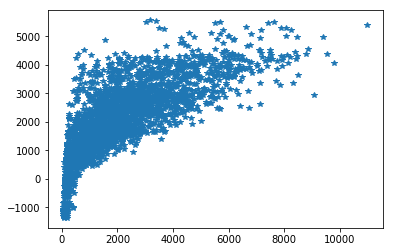

In [132]:
import matplotlib.pyplot as plt   

plt.plot(y_test,y_pred,'*')
plt.show()

In [133]:
regression_model.score(X_test,y_test)

0.5627794711644625

In [134]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1162.723442600959


In [135]:
from sklearn.tree import DecisionTreeRegressor
# because out target variable is continuous.

In [87]:
#dt_model = DecisionTreeRegressor(criterion = 'entropy' ,random_state=0,max_depth=4)
dt_model = DecisionTreeRegressor(max_depth=4)

In [88]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [90]:
y_pred=dt_model.predict(X_test)   # performance on test data

In [92]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV

parameter={'max_depth':np.arange(1,10)}
GS=GridSearchCV(dt_model,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
GS.best_params_

{'max_depth': 5}

In [95]:
dt_model_2 = DecisionTreeRegressor(max_depth=4)

In [96]:
dt_model_2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [101]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['1', '2', '3']
wine_Tree_File = open('wine_tree.dot','w')
dot_data = tree.export_graphviz(dt_model_2, out_file=wine_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

wine_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model_2.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                Imp
Item_Weight                0.000000
Item_Visibility            0.000049
Item_MRP                   0.562312
Item_Visibility_MeanRatio  0.000000
outlet_years               0.088759
Item_Fat_Content_0         0.000000
Item_Fat_Content_1         0.000000
Item_Fat_Content_2         0.000000
Outlet_Location_Type_0     0.000000
Outlet_Location_Type_1     0.000000
Outlet_Location_Type_2     0.000000
Outlet_Type_0              0.319992
Outlet_Type_1              0.000000
Outlet_Type_2              0.000000
Outlet_Type_3              0.028889
Item_Type_Combined_0       0.000000
Item_Type_Combined_1       0.000000
Item_Type_Combined_2       0.000000
Outlet_0                   0.000000
Outlet_1                   0.000000
Outlet_2                   0.000000
Outlet_3                   0.000000
Outlet_4                   0.000000
Outlet_5                   0.000000
Outlet_6                   0.000000
Outlet_7                   0.000000
Outlet_8                   0

In [127]:
y_pred_2 = dt_model_2.predict(X_test)

In [128]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_2})
df.head(10)

,Actual,Predicted
1112,1544.6560,1436.735873
1751,6404.9960,3832.058489
7648,1070.6064,1436.735873
7362,369.5190,271.018828
5332,101.2016,271.018828
5509,181.0976,421.251014
180,6024.1584,3157.886401
8065,4136.6154,3832.058489
8301,5806.4418,6089.748862
6617,1338.2580,1436.735873


In [129]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))

Root Mean Squared Error: 1144.2525906002836


Text(0.5,1,'Decision Tree Regression')

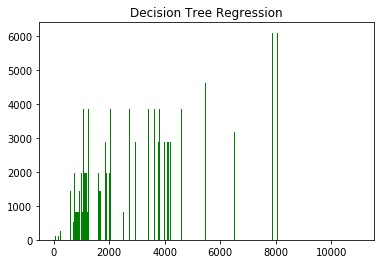

In [149]:
plt.bar(df.Actual, df.Predicted,  
         color = 'green')  
plt.title('Decision Tree Regression') 

In [136]:
from sklearn.ensemble import RandomForestRegressor 

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [137]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [138]:
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [140]:
y_pred_RF = regressor.predict(X_test)

In [141]:
y_pred_RF

array([2322.11066 , 2438.252812, 1654.006992, ..., 1310.600668,
        823.002038, 5594.464396])

In [142]:
df_RF=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_RF})
df_RF.head(10)

,Actual,Predicted
1112,1544.6560,2322.110660
1751,6404.9960,2438.252812
7648,1070.6064,1654.006992
7362,369.5190,277.998132
5332,101.2016,226.105680
5509,181.0976,480.048458
180,6024.1584,4607.642268
8065,4136.6154,4080.741464
8301,5806.4418,5524.575370
6617,1338.2580,1854.426108


In [144]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))

Root Mean Squared Error: 1163.8866124578467


Text(0.5,1,'Random Forest Regression')

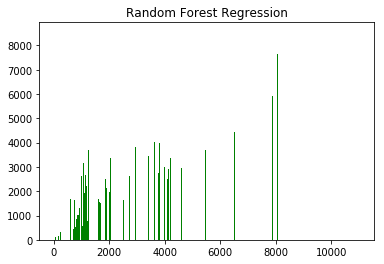

In [147]:
plt.bar(df_RF.Actual, df_RF.Predicted,  
         color = 'green')  
plt.title('Random Forest Regression') 
#plt.xlabel('Position level') 
#plt.ylabel('Salary') 
#plt.show()